<h1>Euler's method<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#What-do-we-need-Euler's-method-for?" data-toc-modified-id="What-do-we-need-Euler's-method-for?-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>What do we need Euler's method for?</a></span></li><li><span><a href="#How-does-Euler's-method-work?" data-toc-modified-id="How-does-Euler's-method-work?-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>How does Euler's method work?</a></span></li><li><span><a href="#How-to-extend-to-higher-order-ODEs?" data-toc-modified-id="How-to-extend-to-higher-order-ODEs?-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>How to extend to higher order ODEs?</a></span></li><li><span><a href="#What-are-the-limitations?" data-toc-modified-id="What-are-the-limitations?-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>What are the limitations?</a></span></li></ul></div>

# What should I know before I start?
 - How to define functions in python.
 - How to use `numpy.array`.
 - How to use `matplotlib.pyplot`.

# Euler's method

## What do we need Euler's method for?
In scientific and technical applications, ordinary differential equations (ODE) are usually so complex that the calculation of an exact solution is only possible in very simple cases.
Therefore, many practical problems have to be solved by numerical approximation methods.

Although one speaks of numerical solution methods for ordinary differential equations, strictly speaking one means numerical methods for solving initial value problems.
One looks for the solution of a differential equation or a system of differential equations which has a given initial value at a given starting time.

A numerical method provides a sequence of approximate values as a solution to an initial value problem.
In practice, one requires that these approximate values agree with the mathematically exact solution within a given tolerance.

The most basic approximation method for solving ODEs goes back to the German mathematician Leonhard Euler.

## How does Euler's method work?
Eulers's method determines approximations $\tilde{x}_0$, $\tilde{x}_1$, $\tilde{x}_2$, $\ldots$, $\tilde{x}_n$ to the exact solution $x$ of an ODE.
Initially we concentrate on explicit first-order differential equations in the form

$$
    x'(t) = f(t,x(t)), \quad x(t_0) = x_0, \quad t \in [t_0,t_n].
$$

The idea is to start with the initial value $\tilde{x}_0 = x_0$, which we assume is known.
Then, from the differential equation, the slope

$$
x'(t_0) = f(t_0,\tilde{x}_0)
$$

can be computed, and with that the tangent line in $\tilde{x}_0$.
Take a small step with size $h$ along that tangent line up to a point

$$
    \tilde{x}_1 = \tilde{x}_0 + h \cdot f(t_0,\tilde{x}_0).
$$

The value $\tilde{x}_1$ is a good approximation for the exact value of $x$ at $t_1=t_0+h$.

Even if $\tilde{x}_1$, unlike $\tilde{x}_0$, is not an exact solution value, we can continue the procedure starting in $x_1$ in the same way

$$
    \tilde{x}_2 = \tilde{x}_1 + h \cdot f(t_1,\tilde{x}_1).
$$

We repeat this until we have reached the position $x_n$ corresponding to time $t_n = t_0 + n \cdot h$.

<div class="alert alert-block alert-warning">
    
<b>Example</b>

Let us consider the initial value problem
    
$$
x'(t) + \frac{x(t)}{1+t} = -6 \, t, \quad x(0) = 3, \quad t \in [0,5],
$$
    
with a first-order ODE.
To prepare Euler's method, we rewrite the differential equation in a suitable form, i.e. we isolate the first derivative on the left hand side of the equation:

$$
x'(t) = \underbrace{-6 \, t - \frac{x(t)}{1+t}}_{\displaystyle f(t,x(t))}.
$$
    
The term on the right hand side of the equation represents the function $f$, which corresponds to the slope.
We implement this function in Python.
</div>

In [1]:
def f(t,x):
    f = -6*t-x/(1+t)
    return f

<div class="alert alert-block alert-warning">
With the function $f$ Euler's method can be represented as follows:
    
$$
    \begin{array}{lcl}
    \tilde{x}_{k+1} & = & \tilde{x}_k + h \cdot f(t_k,\tilde{x}_k) \\
    t_{k+1}         & = & t_k + h
    \end{array}
$$

The values $t_k$ are equaly spaced and can be generated in Python by `numpy.arange()`. 
The approximate values $\tilde{x}_k$ are calcuklated step by step and stored in a one dimensional array, which is initialized by zeors using `numpy.zeros()`.
The size of those arrays is determined by

$$
    n = \frac{t_n - t_0}{h} \, .
$$
</div>

In [2]:
import numpy as np
def euler(t0,tn,h,x0):
    n = int((tn-t0)/h)
    t = np.linspace(t0,tn,n+1)
    x = np.zeros(n+1)
    x[0] = x0
    for k in range(n):
        x[k+1] = x[k]+h*f(t[k],x[k])
    return t, x

In [3]:
t0 = 0.0
tn = 5.0
h = 0.2
x0 = 3.0
t, x = euler(t0,tn,h,x0)
print('t = ',t)
print('x = ',x)

t =  [0.  0.2 0.4 0.6 0.8 1.  1.2 1.4 1.6 1.8 2.  2.2 2.4 2.6 2.8 3.  3.2 3.4
 3.6 3.8 4.  4.2 4.4 4.6 4.8 5. ]
x =  [  3.           2.4          1.76         1.02857143   0.18
  -0.8         -1.92        -3.18545455  -4.6         -6.16615385
  -7.88571429  -9.76       -11.79       -13.97647059 -16.32
 -18.82105263 -21.48       -24.29714286 -27.27272727 -30.40695652
 -33.7        -37.152      -40.76307692 -44.53333333 -48.46285714
 -52.55172414]


<div class="alert alert-block alert-warning">
    
A plot can be easily created with `matplotlib`.
</div>

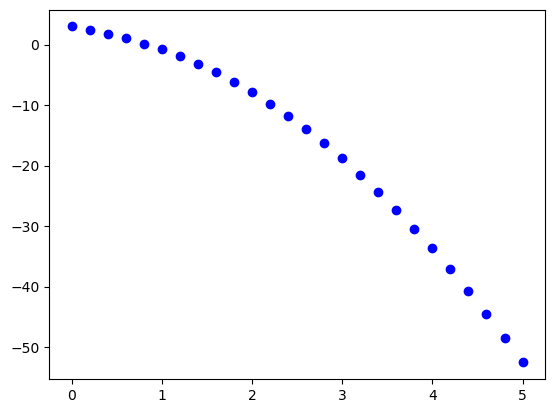

In [4]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(t,x,'ob')

## How to extend to higher order ODEs?
The idea is to convert a higher order ODE into a set of first-order ODEs.
Once we get a bunch of first-order ODEs, we can apply Euler's method to each first-order ODE. 
We will look into the process of the conversion through an example. 

<div class="alert alert-block alert-warning">
    
<b>Example</b>

Let us consider the initial value problem
    
$$
x''(t) + x'(t) + \sin \left( x(t) \right) = \cos(t), \quad x(0) = 3, \quad x'(0) = 0, \quad t \in [0,6 \, \pi],
$$
    
with a second-order ODE.
Now, the trick is like this.
First, we look for the order of the equation and replace all the terms of lower than the order with so called state variables.
Since this is a second-order differential equation, we will replace $x(t)$ and $x'(t)$ with the variables $z_0(t)$ and $z_1(t)$: 

$$
    \left.
    \begin{array}{ccl}
        z_0(t) & = & x(t) \\
        z_1(t) & = & x'(t) \\
    \end{array}
    \right\}
    \quad \Longrightarrow \quad
    x''(t) + z_1(t) + \sin \left( z_0(t) \right) = \cos(t).
$$

In addition, we replace $x''(t)$ by $z_1'(t)$, which results in a first-order ODE:

$$
z_1'(t) = \cos(t) - z_1(t) - \sin \left( z_0(t) \right).    
$$

Now we have to consider that the two variables $z_0(t)$ and $z_1(t)$ are linked:
    
$$
    z_0'(t) = x'(t) = z_1(t)
$$

Altogether we get a system with two first-order equations:
    
$$
    \begin{array}{ccl}
    z_0'(t) & = & z_1(t), \\
    z_1'(t) & = & \cos(t) - z_1(t) - \sin \left( z_0(t) \right). \\    
    \end{array}
$$
    
In vector notation

$$
    z'(t) = 
    \left(
        \begin{array}{c}
            z_0(t) \\
            z_1(t)
        \end{array}
    \right)'
    =
    \underbrace{
    \left(
        \begin{array}{l}
            z_1(t), \\
            \cos(t) - z_1(t) - \sin \left( z_0(t) \right). \\    
        \end{array}
    \right)
    }_{\displaystyle f(t,z(t))},
$$

the system of differential equations looks exactly the same as the first-order differential equation.
Therefore we can use Euler's method in a similar way.
</div>

In [5]:
from math import sin, cos
def f2(t,z):
    f2 = np.array([z[1],cos(t)-z[1]-sin(z[0])])
    return f2

<div class="alert alert-block alert-warning">
    
Again, we calculate the approximate values step by step and store the values for $t_k$ and $\tilde{z}_k$.
Since $z$ is now a two-dimensional vector, we need a matrix to store it.
</div>

In [6]:
import numpy as np
def euler2(t0,tn,h,z0):
    n = int((tn-t0)/h)
    t = np.linspace(t0,tn,n+1)
    z = np.zeros([len(z0),n+1])
    z[:,0] = z0
    for k in range(n):
        z[:,k+1] = z[:,k]+h*f2(t[k],z[:,k])
    return t, z

In [7]:
t0 = 0.0
tn = 6*np.pi
h = 0.01
z0 = np.array([3.0,0.0])
t, z = euler2(t0,tn,h,z0)
print('t = ',t)
print('z = ',z)

t =  [0.00000000e+00 1.00050721e-02 2.00101443e-02 ... 1.88295458e+01
 1.88395508e+01 1.88495559e+01]
z =  [[3.         3.         3.00008589 ... 6.13774338 6.14779307 6.15785672]
 [0.         0.0085888  0.01709121 ... 1.00496824 1.00636586 1.00765149]]


<div class="alert alert-block alert-warning">
    
Using `matplotlib` we can plot the first sate $z_0$ over $t$ and the second state $z_1$ over $t$ as well.
</div>

[Text(0.5, 0, '$t$'), Text(0, 0.5, '$z_1$')]

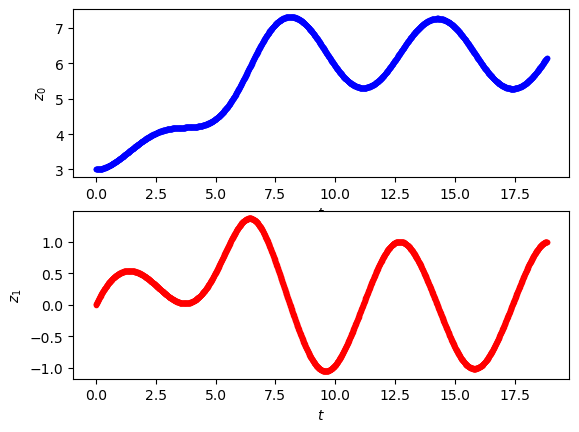

In [8]:
fig, (ax1,ax2) = plt.subplots(2,1)
ax1.plot(t,z[0,:],'.b')
ax1.set(xlabel='$t$', ylabel='$z_0$')
ax2.plot(t,z[1,:],'.r')
ax2.set(xlabel='$t$', ylabel='$z_1$')

<div class="alert alert-block alert-warning">

Especially for second order differential equations the solution is often shown as a phase plot.
Here the state $z_1$ is plotted depending on the state $z_0$.
</div>

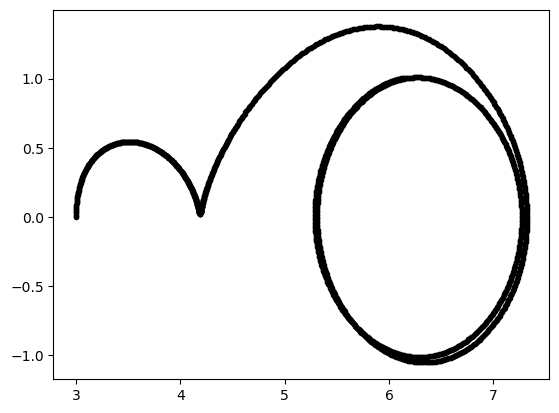

In [9]:
fig, ax = plt.subplots()
ax.plot(z[0,:],z[1,:],'.k')

## What are the limitations?
Numerical methods require concrete values for all quantities in the differential equation.
Dependencies of the solution on parameter values cannot be recognized directly with numerical methods.

The art in numerics is to choose the best possible value for the step size.
The larger you choose the step size, the greater the difference between the approximate value and the exact solution. 
If you choose a very small step size, many steps are required to approximate the solution.
There are heuristics that try to optimally adjust the step size in each step.
However, we always use the same step size here.

# Conclusion
 - Euler's method is a numerical procedure for solving ordinary differential equations.
 - It needs initial values.
 - It can be used for a first-order equation, for a higher order equation or for a system of equations.

# Did you get it?
<div class="alert alert-block alert-info">
    
<b>Task 1</b>

Apply Euler's method to the first-order differential equation

$$
t \, x'(t) = (1 - t) \, x(t), \quad x(1) = 1, \quad t \in [1,3].
$$
</div>

[Text(0.5, 0, '$t$'), Text(0, 0.5, '$x$')]

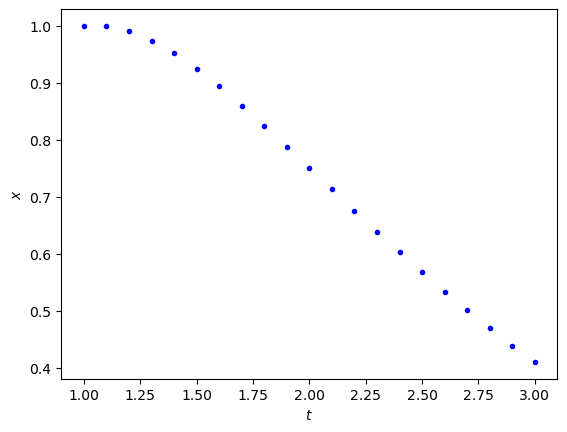

In [12]:
def f(t,x):
    f = (1.0-t)*x/t
    return f

t0 = 1.0
tn = 3.0
h = 0.1
x0 = 1.0
t, x = euler(t0,tn,h,x0)

fig, ax = plt.subplots(1,1)
ax.plot(t,x[:],'.b')
ax.set(xlabel='$t$', ylabel='$x$')
#plt.savefig("euler1.png")

<div class="alert alert-block alert-info">

<b>Task 2</b>
    
Apply Euler's method to the second-order equation

$$
x''(t) + 2(1 + x(t)^2)x'(t) + 4 \, x(t) = \cos ( 3\, t), \quad x(0) = 0, \quad x'(0) = 1, \quad t \in [0,1].
$$
</div>

[Text(0.5, 0, '$x(t)$'), Text(0, 0.5, "$x'(t)$")]

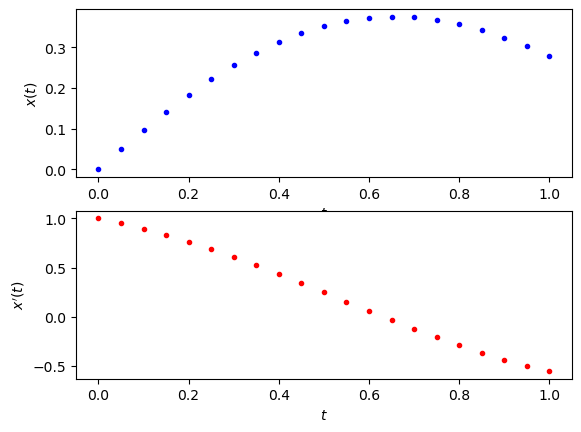

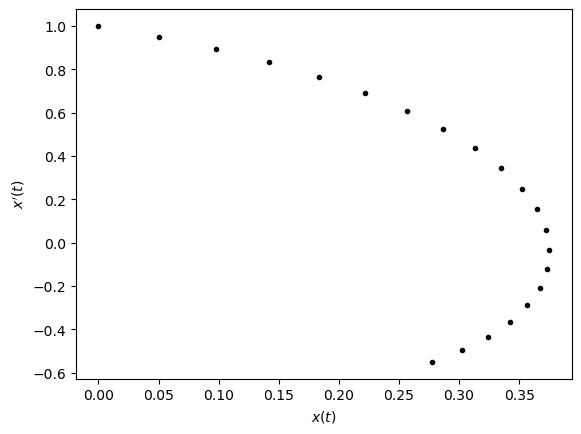

In [11]:
def f2(t,z):
    f2 = np.array([z[1],-2.0*(1.0+z[0]**2)*z[1]-4.0*z[0]+np.cos(3.0*t)])
    return f2

t0 = 0.0
tn = 1.0
h = 0.05
z0 = np.array([0.0,1.0])
t, z = euler2(t0,tn,h,z0)

fig, (ax1,ax2) = plt.subplots(2,1)
ax1.plot(t,z[0,:],'.b')
ax1.set(xlabel='$t$', ylabel='$x(t)$')
ax2.plot(t,z[1,:],'.r')
ax2.set(xlabel='$t$', ylabel="$x'(t)$")
#plt.savefig("euler2a.png")
        
fig, ax = plt.subplots()
ax.plot(z[0,:],z[1,:],'.k')
ax.set(xlabel='$x(t)$', ylabel="$x'(t)$")
#plt.savefig("euler2b.png")